In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ast
from evaluation import plot_evaluation, get_best_model, plot_test_results_subplots
plt.style.use('ggplot')

In [2]:
# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
metrics = pd.read_csv('metrics_opt.csv')
no_augmentation, mirror_and_crop_val = get_best_model(metrics, 'val/mAcc')

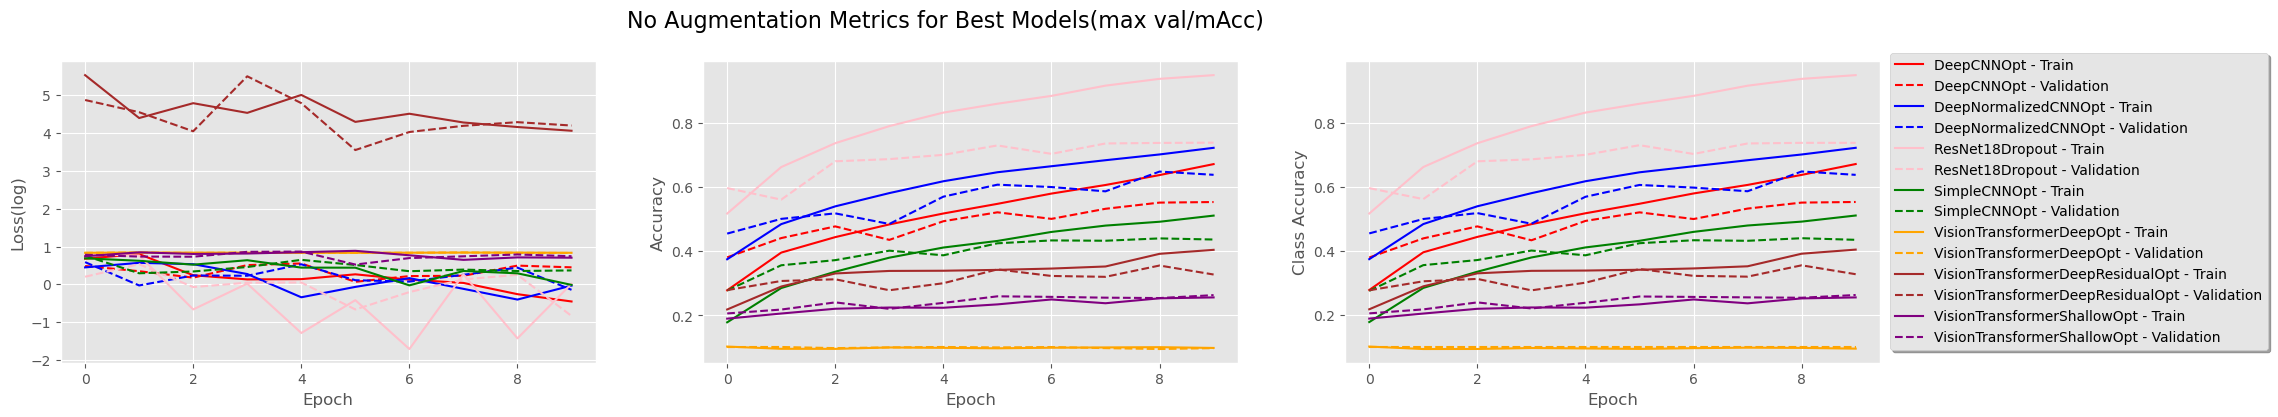

In [4]:
# for mirror
plot_evaluation(no_augmentation, 'No Augmentation')

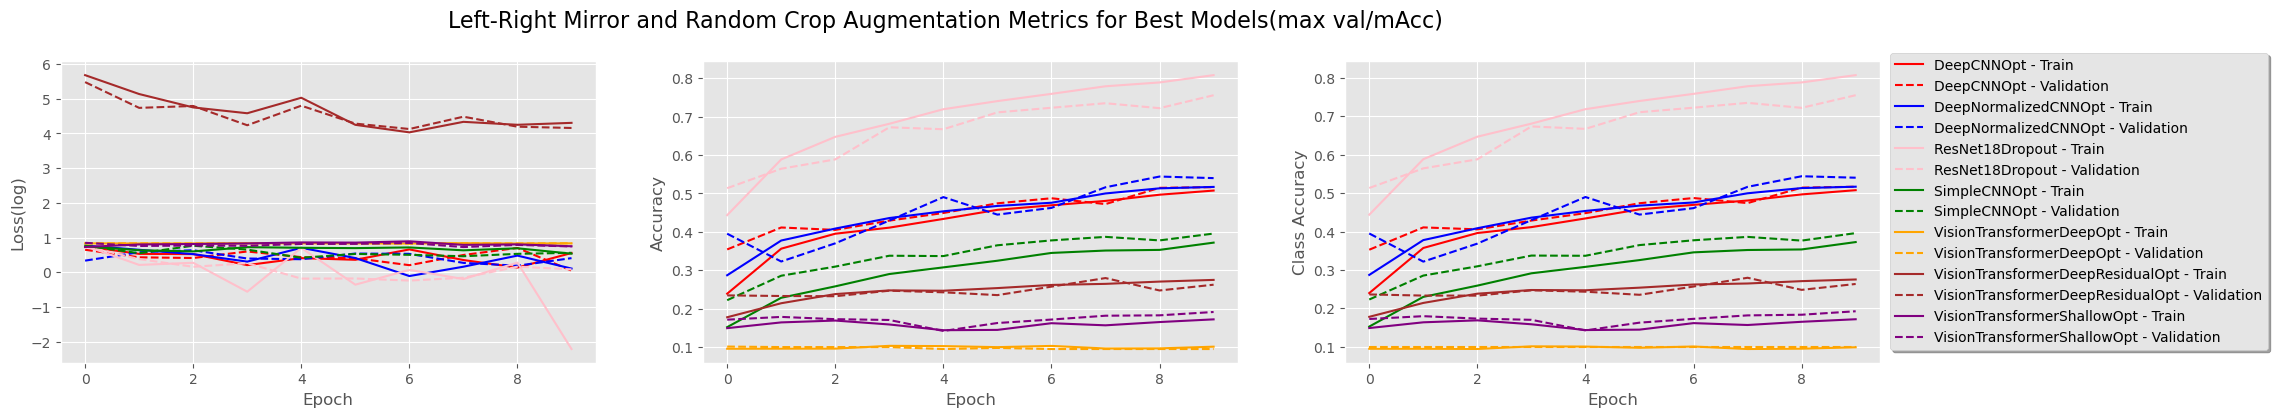

In [5]:
# for mirror and crop
plot_evaluation(mirror_and_crop_val, 'Left-Right Mirror and Random Crop Augmentation')

In [6]:
results = pd.read_csv('results_opt.csv')

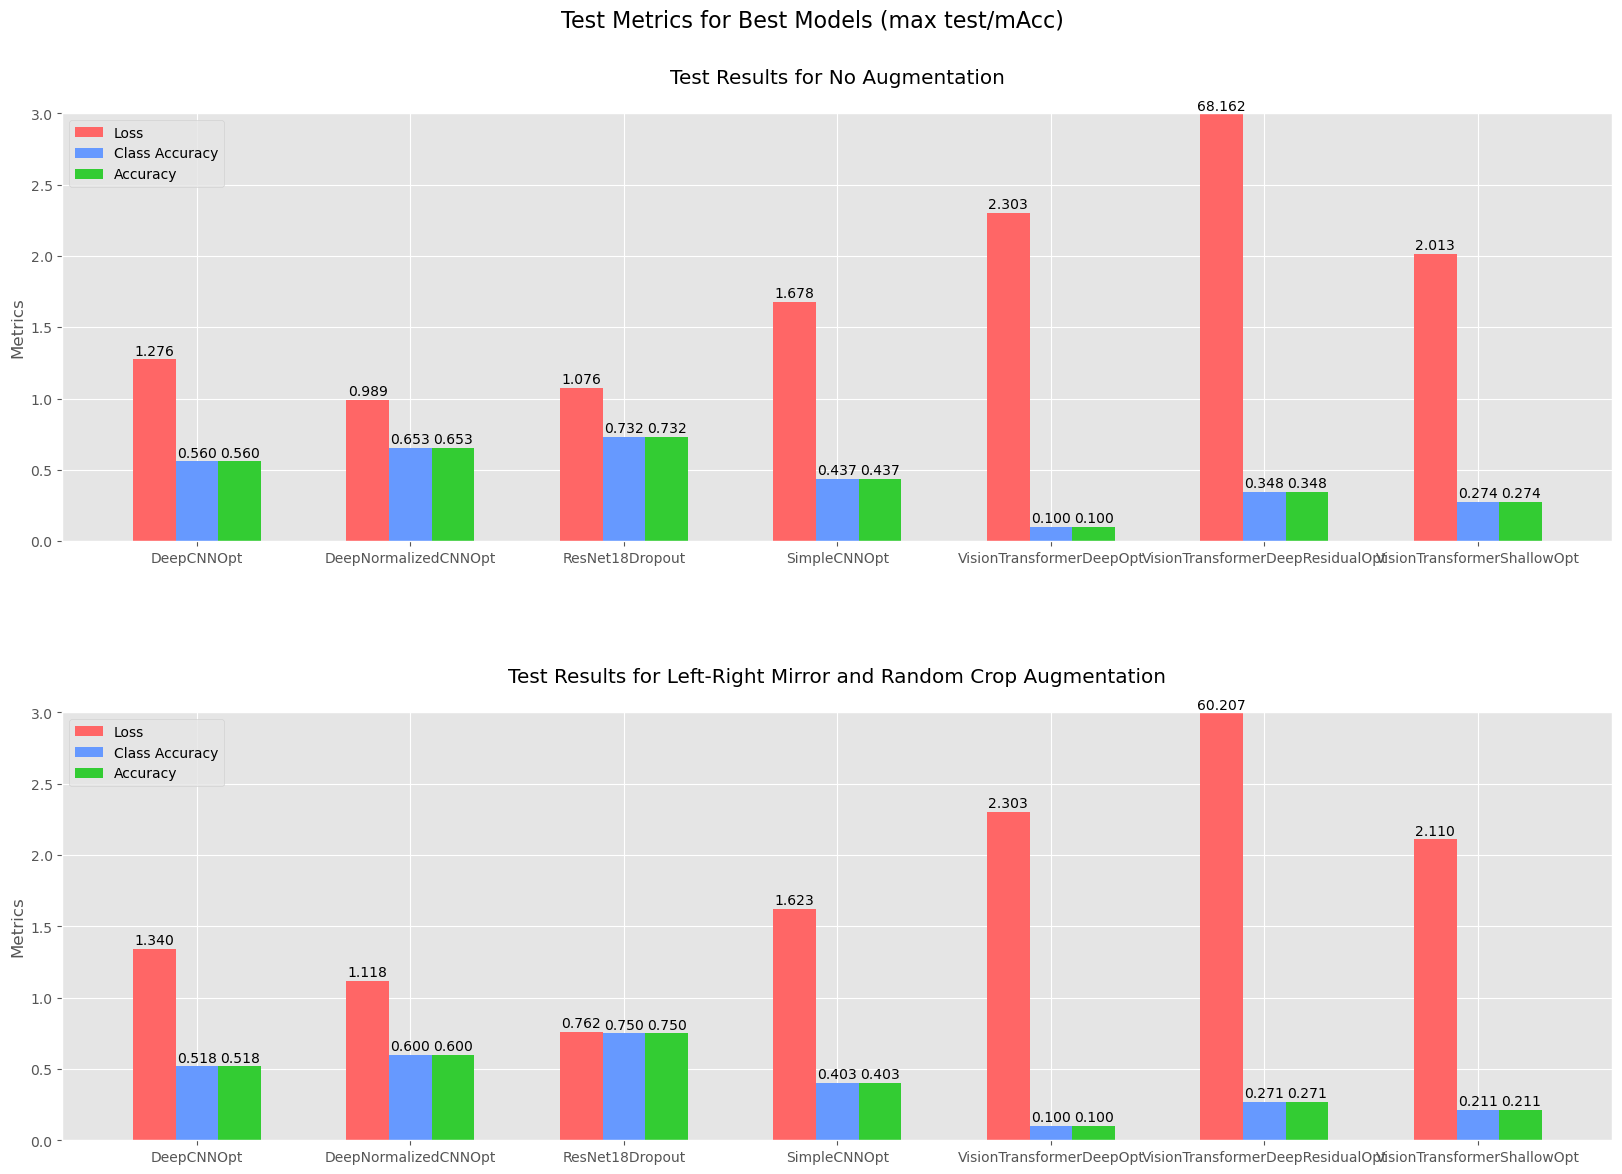

In [7]:
plot_test_results_subplots(results)

In [8]:
results = pd.read_csv('results_opt.csv')
test_mirror_and_crop, test_no_augmentation = get_best_model(results, 'test/mAcc')

In [9]:
# merge the two dataframes with a new column to indicate the type of augmentation
test_no_augmentation['augmentation'] = 'No'
test_mirror_and_crop['augmentation'] = 'Both'

# concatenate the two dataframes, between two models, take the one with the highest test accuracy
test_results = pd.concat([test_no_augmentation, test_mirror_and_crop])
test_results = results.sort_values('test/mAcc', ascending=False)
test_results = results.drop_duplicates(subset='model', keep='first').reset_index(drop=True)

In [10]:
test_results

,model,test/loss,test/mClassAcc,test/mAcc,params,left_right_mirror,random_crop,condition
0,SimpleCNNOpt,1.623381,0.4029,0.4029,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
1,DeepCNNOpt,1.405792,0.4962,0.4962,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
2,DeepNormalizedCNNOpt,1.192240,0.5726,0.5726,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
3,VisionTransformerShallowOpt,2.185548,0.1918,0.1918,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
4,VisionTransformerDeepOpt,2.302983,0.1000,0.1000,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
5,VisionTransformerDeepResidualOpt,62.281538,0.2695,0.2695,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop
6,ResNet18Dropout,0.762135,0.7503,0.7503,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop


In [11]:
metrics = pd.read_csv('metrics_opt.csv')
metrics_no_augmentation, metrics_mirror_and_crop = get_best_model(metrics, 'val/mAcc')

In [12]:
# merge the two dataframes with a new column to indicate the type of augmentation
metrics_no_augmentation['augmentation'] = 'No'
metrics_mirror_and_crop['augmentation'] = 'Both'

# concatenate the two dataframes, between two models, take the one with the highest test accuracy
metrics_results = pd.concat([metrics_no_augmentation, metrics_mirror_and_crop])
best_model_indices = metrics_results.groupby(['condition', 'model'])['val/mAcc'].idxmax()
metrics_results = metrics_results.loc[best_model_indices].reset_index(drop=True)
metrics_results = metrics_results.drop_duplicates(subset='model', keep='first').reset_index(drop=True)

In [13]:
metrics_results

,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,params,left_right_mirror,random_crop,condition,augmentation
0,DeepCNNOpt,"(2.11472487449646, 1.7041871547698975, 1.69232...","(0.23959719985723496, 0.35713902562856675, 0.3...","(0.2392, 0.3564, 0.3953, 0.4111, 0.4338, 0.457...","(1.918713927268982, 1.5427172183990479, 1.5130...","(0.35261952206492425, 0.4107730135321617, 0.40...","(0.3544, 0.4115, 0.4052, 0.4294, 0.4492, 0.474...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop,Both
1,DeepNormalizedCNNOpt,"(2.161842107772827, 1.9161949157714844, 1.6919...","(0.2869339793920517, 0.37767394036054613, 0.40...","(0.2872, 0.3776, 0.4087, 0.4361, 0.4536, 0.467...","(1.4025225639343262, 1.787412166595459, 1.8923...","(0.3948789671063423, 0.32160772047936914, 0.36...","(0.3953, 0.323, 0.3703, 0.4296, 0.4906, 0.445,...","{'dropout_rate': 0.5, 'left_right_mirror': Tru...",True,True,mirrior_and_crop,Both
2,ResNet18Dropout,"(2.146782875061035, 1.2397794723510742, 1.3189...","(0.4438504993915558, 0.5885124266147613, 0.647...","(0.4436, 0.5886, 0.6474, 0.6814, 0.7193, 0.740...","(2.1218903064727783, 1.4662437438964844, 1.174...","(0.5134561032056808, 0.5645917117595672, 0.588...","(0.5138, 0.5644, 0.5887, 0.6723, 0.6672, 0.711...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop,Both
3,SimpleCNNOpt,"(2.121333122253418, 1.8918124437332153, 1.8293...","(0.15228328704833985, 0.22968883402645587, 0.2...","(0.1522, 0.2286, 0.2583, 0.2904, 0.3077, 0.325...","(2.1667447090148926, 1.7357958555221558, 2.154...","(0.2228614130988717, 0.2852677697315812, 0.309...","(0.2223, 0.286, 0.3097, 0.338, 0.3371, 0.3652,...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop,Both
4,VisionTransformerDeepOpt,"(2.3071348667144775, 2.296457529067993, 2.2983...","(0.09448330607265235, 0.09453110992908478, 0.0...","(0.0959, 0.0962, 0.0963, 0.1035, 0.1028, 0.100...","(2.306792736053467, 2.3084120750427246, 2.3010...","(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","(0.1016, 0.1003, 0.1003, 0.1003, 0.0952, 0.098...","{'dropout_rate': 0.5, 'left_right_mirror': Tru...",True,True,mirrior_and_crop,Both
5,VisionTransformerDeepResidualOpt,"(293.1436767578125, 170.13331604003906, 115.69...","(0.1777275800704956, 0.21393050998449326, 0.23...","(0.1779, 0.2144, 0.2382, 0.2478, 0.2469, 0.253...","(239.86354064941406, 114.20877075195312, 120.5...","(0.23604488978162408, 0.23309783190488814, 0.2...","(0.2348, 0.2332, 0.2326, 0.247, 0.2428, 0.2355...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop,Both
6,VisionTransformerShallowOpt,"(2.075554132461548, 2.2361271381378174, 2.2645...","(0.1484723798930645, 0.16341344714164735, 0.16...","(0.1495, 0.1645, 0.1693, 0.1591, 0.1442, 0.145...","(2.342519521713257, 2.138852834701538, 2.16623...","(0.17206318117678165, 0.1794182498008013, 0.17...","(0.1716, 0.1788, 0.1729, 0.1708, 0.1422, 0.162...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",True,True,mirrior_and_crop,Both


In [14]:
# merge the two dataframes
df_merged = pd.merge(metrics_results, test_results, on='model', suffixes=('_val', '_test'))

In [15]:
# drop unnecessary columns: left_right_mirror_val, left_right_mirror_test, random_crop_val, random_crop_test, condition_val, condition_test
df_merged = df_merged.drop(columns=['left_right_mirror_val', 'left_right_mirror_test', 'random_crop_val', 'random_crop_test', 'condition_val', 'condition_test'])
df_merged

,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,params_val,augmentation,test/loss,test/mClassAcc,test/mAcc,params_test
0,DeepCNNOpt,"(2.11472487449646, 1.7041871547698975, 1.69232...","(0.23959719985723496, 0.35713902562856675, 0.3...","(0.2392, 0.3564, 0.3953, 0.4111, 0.4338, 0.457...","(1.918713927268982, 1.5427172183990479, 1.5130...","(0.35261952206492425, 0.4107730135321617, 0.40...","(0.3544, 0.4115, 0.4052, 0.4294, 0.4492, 0.474...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,1.405792,0.4962,0.4962,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
1,DeepNormalizedCNNOpt,"(2.161842107772827, 1.9161949157714844, 1.6919...","(0.2869339793920517, 0.37767394036054613, 0.40...","(0.2872, 0.3776, 0.4087, 0.4361, 0.4536, 0.467...","(1.4025225639343262, 1.787412166595459, 1.8923...","(0.3948789671063423, 0.32160772047936914, 0.36...","(0.3953, 0.323, 0.3703, 0.4296, 0.4906, 0.445,...","{'dropout_rate': 0.5, 'left_right_mirror': Tru...",Both,1.192240,0.5726,0.5726,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
2,ResNet18Dropout,"(2.146782875061035, 1.2397794723510742, 1.3189...","(0.4438504993915558, 0.5885124266147613, 0.647...","(0.4436, 0.5886, 0.6474, 0.6814, 0.7193, 0.740...","(2.1218903064727783, 1.4662437438964844, 1.174...","(0.5134561032056808, 0.5645917117595672, 0.588...","(0.5138, 0.5644, 0.5887, 0.6723, 0.6672, 0.711...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,0.762135,0.7503,0.7503,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
3,SimpleCNNOpt,"(2.121333122253418, 1.8918124437332153, 1.8293...","(0.15228328704833985, 0.22968883402645587, 0.2...","(0.1522, 0.2286, 0.2583, 0.2904, 0.3077, 0.325...","(2.1667447090148926, 1.7357958555221558, 2.154...","(0.2228614130988717, 0.2852677697315812, 0.309...","(0.2223, 0.286, 0.3097, 0.338, 0.3371, 0.3652,...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,1.623381,0.4029,0.4029,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
4,VisionTransformerDeepOpt,"(2.3071348667144775, 2.296457529067993, 2.2983...","(0.09448330607265235, 0.09453110992908478, 0.0...","(0.0959, 0.0962, 0.0963, 0.1035, 0.1028, 0.100...","(2.306792736053467, 2.3084120750427246, 2.3010...","(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","(0.1016, 0.1003, 0.1003, 0.1003, 0.0952, 0.098...","{'dropout_rate': 0.5, 'left_right_mirror': Tru...",Both,2.302983,0.1000,0.1000,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
5,VisionTransformerDeepResidualOpt,"(293.1436767578125, 170.13331604003906, 115.69...","(0.1777275800704956, 0.21393050998449326, 0.23...","(0.1779, 0.2144, 0.2382, 0.2478, 0.2469, 0.253...","(239.86354064941406, 114.20877075195312, 120.5...","(0.23604488978162408, 0.23309783190488814, 0.2...","(0.2348, 0.2332, 0.2326, 0.247, 0.2428, 0.2355...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,62.281538,0.2695,0.2695,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
6,VisionTransformerShallowOpt,"(2.075554132461548, 2.2361271381378174, 2.2645...","(0.1484723798930645, 0.16341344714164735, 0.16...","(0.1495, 0.1645, 0.1693, 0.1591, 0.1442, 0.145...","(2.342519521713257, 2.138852834701538, 2.16623...","(0.17206318117678165, 0.1794182498008013, 0.17...","(0.1716, 0.1788, 0.1729, 0.1708, 0.1422, 0.162...","{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,2.185548,0.1918,0.1918,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."


In [16]:
from statistics import mean

# Convert selected columns to numeric type
list_of_columns = ['train/loss', 'train/mClassAcc', 'train/mAcc', 'val/loss', 'val/mClassAcc', 'val/mAcc']

for column in list_of_columns:
    # the columns are in string format, convert them to list
    df_merged[column] = df_merged[column].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
    # take the mean of the list
    df_merged[column] = df_merged[column].apply(lambda x: mean(x))

df_merged


,model,train/loss,train/mClassAcc,train/mAcc,val/loss,val/mClassAcc,val/mAcc,params_val,augmentation,test/loss,test/mClassAcc,test/mAcc,params_test
0,DeepCNNOpt,1.594912,0.425121,0.42477,1.580907,0.451184,0.45153,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,1.405792,0.4962,0.4962,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
1,DeepNormalizedCNNOpt,1.548641,0.443612,0.44373,1.549361,0.451078,0.45166,"{'dropout_rate': 0.5, 'left_right_mirror': Tru...",Both,1.192240,0.5726,0.5726,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
2,ResNet18Dropout,1.133751,0.695345,0.69560,1.165399,0.665438,0.66532,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,0.762135,0.7503,0.7503,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
3,SimpleCNNOpt,1.960401,0.298908,0.29843,1.791890,0.339188,0.33969,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,1.623381,0.4029,0.4029,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
4,VisionTransformerDeepOpt,2.304454,0.096817,0.09929,2.303569,0.100000,0.09765,"{'dropout_rate': 0.5, 'left_right_mirror': Tru...",Both,2.302983,0.1000,0.1000,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
5,VisionTransformerDeepResidualOpt,117.677550,0.245013,0.24516,101.915928,0.247469,0.24736,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,62.281538,0.2695,0.2695,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."
6,VisionTransformerShallowOpt,2.262056,0.158014,0.15887,2.205958,0.172864,0.17275,"{'dropout_rate': 0.25, 'left_right_mirror': Tr...",Both,2.185548,0.1918,0.1918,"{'dropout_rate': 0.25, 'left_right_mirror': Tr..."


In [17]:
print("\\begin{table}[h]")
print("\\caption{Model benchmarks}")
print("\\begin{center}")
print("\\begin{tabular}{ |c|c|c|c|c|c| }")
print("\\hline")
print("\\textbf{Model} & \\textbf{val. ACC} & \\textbf{val PACC} & \\textbf{test ACC} & \\textbf{test PACC} & \\textbf{Augmentation} \\\\")
print("\\hline")
for index, row in df_merged.iterrows():
    print(f"{row['model']} & {row['val/mAcc']:.2f} & {row['val/mClassAcc']:.2f} & {row['test/mAcc']:.2f} & {row['test/mClassAcc']:.2f} & {row['augmentation']} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\end{table}")


\begin{table}[h]
\caption{Model benchmarks}
\begin{center}
\begin{tabular}{ |c|c|c|c|c|c| }
\hline
\textbf{Model} & \textbf{val. ACC} & \textbf{val PACC} & \textbf{test ACC} & \textbf{test PACC} & \textbf{Augmentation} \\
\hline
DeepCNNOpt & 0.45 & 0.45 & 0.50 & 0.50 & Both \\
DeepNormalizedCNNOpt & 0.45 & 0.45 & 0.57 & 0.57 & Both \\
ResNet18Dropout & 0.67 & 0.67 & 0.75 & 0.75 & Both \\
SimpleCNNOpt & 0.34 & 0.34 & 0.40 & 0.40 & Both \\
VisionTransformerDeepOpt & 0.10 & 0.10 & 0.10 & 0.10 & Both \\
VisionTransformerDeepResidualOpt & 0.25 & 0.25 & 0.27 & 0.27 & Both \\
VisionTransformerShallowOpt & 0.17 & 0.17 & 0.19 & 0.19 & Both \\
\hline
\end{tabular}
\end{center}
\end{table}
